# Randomness

### Pseudo random examples

In [13]:
import random

print("Random float: ", random.random())

Random float:  0.8219540423197268


In [14]:
print("Random integer: ", random.randint(0, 9))

Random integer:  7


In [15]:
random_list = ['Tree', 'Keys', 'Washing Machine', 'Tomato', 'Money']

print("Random element from list:", random.choice(random_list))

Random element from list: Washing Machine


random_list generated with: https://www.randomlists.com/things

In [16]:
random.shuffle(random_list)
print ("Printing shuffled list ", random_list)

Printing shuffled list  ['Washing Machine', 'Keys', 'Tomato', 'Money', 'Tree']


All the examples above are **pseudo** random as they can be replicated with a fixed seed:

In [17]:
random.seed(6)
print(random.randint(0, 9999))

9401


### True random

#### Lavarand

The company Cloudfare uses a wall of lava lamps to generate cryptographic entropy in generating random numbers. The company videotapes the lamps and turns the footage into a stream of “random, unpredictable bytes” to generate secure encryption keys.

source: https://laughingsquid.com/cloudflare-wall-of-lava-lamps/

The original Lavarand was a hardware random number generator designed by Silicon Graphics that worked by taking pictures of the patterns made by the floating material in lava lamps, extracting random data from the pictures, and using the result to seed a pseudorandom number generator.

source: https://en.wikipedia.org/wiki/Lavarand

In [18]:
from IPython.display import Image
Image(url='https://blog.cloudflare.com/content/images/2017/11/lava-lamps.jpg')

#### System random

- /dev/random (typically blocks if there is less entropy available than requested)
- /dev/urandom (typically never blocks, even if the pseudorandom number generator seed was not fully initialized)

Common sources include:
- environmental noise collected from device drivers
- hardware interrupt (timing assumed) 

In [19]:
number = random.SystemRandom().random()
print(number)

0.041060192039250376


#### random.org

In [20]:
import requests

x = requests.get('https://www.random.org/integers/?num=1&min=1&max=9999&col=1&base=10&format=plain&rnd=new')

print(x.text)

2573



In [21]:
random.seed(x.text)

print(random.randint(1, 9999))

4259


### Generating random data with numpy

In [6]:
!pip install numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 6.2 MB/s eta 0:00:006.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 8.4 MB/s eta 0:00:009.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 6.6 MB/s eta 0:00:006.3 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [72]:
import numpy as np

color = np.random.randint(256, size=3)

print(color)

[ 47  58 151]


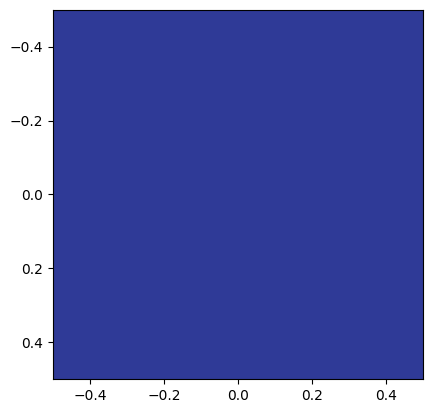

In [74]:
import matplotlib.pyplot as plt

img = color * np.ones([1, 1, 3], dtype=np.uint8)

plot = plt.imshow(img)
plt.show()

In [96]:
width, height = 3, 3

random_colors = [np.random.randint(256, size=3) for x in range(width*height)]

# print(random_colors)

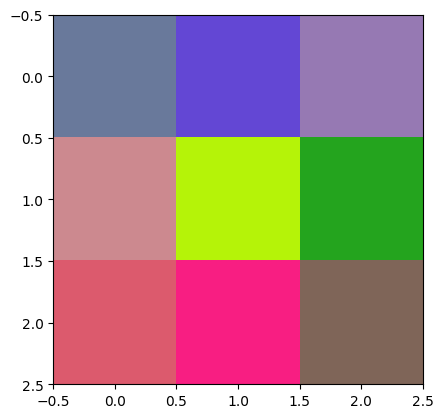

In [97]:
random_color_arr = np.array(random_colors)

grid = np.reshape(np.arange(width*height, dtype=np.uint8), (width, height))

plt.imshow(random_color_arr[grid])

plt.show()

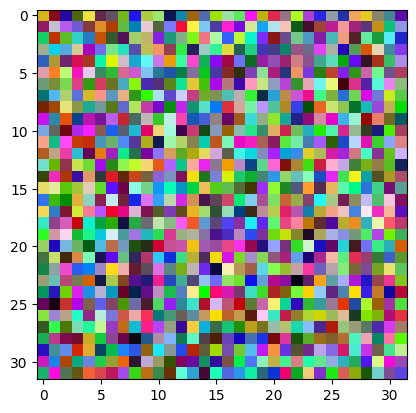

In [92]:
# create a random number generator
rng = np.random.default_rng()

img = (rng.standard_normal([32, 32, 3]) * 255).astype(np.uint8)

plt.imshow(img)

plt.show()

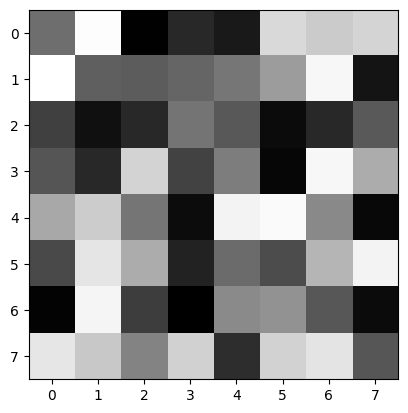

In [95]:
data = rng.random([8, 8])

plt.imshow(data, cmap='Greys', interpolation='none')

plt.show()

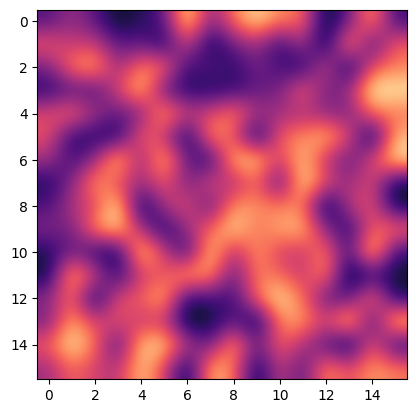

In [98]:
data = rng.random([16, 16])

plt.imshow(data, cmap='magma', interpolation='bicubic')

plt.show()

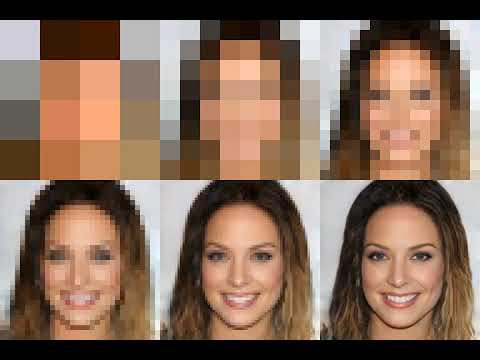

In [99]:
from IPython.display import YouTubeVideo
YouTubeVideo('imbsfD_HB1I')

In [140]:
ys = rng.random(size=64)
print(ys)
x = [x for x in range(len(ys))]
print(x)

[0.89249914 0.71368517 0.04325191 0.1482225  0.71620134 0.63817721
 0.64814927 0.54240917 0.34640985 0.52080698 0.92419441 0.40288417
 0.20014263 0.75361714 0.01494532 0.80873631 0.93051673 0.90327532
 0.00551612 0.68045369 0.64870977 0.13625571 0.67865065 0.6154719
 0.31096995 0.0861012  0.28869148 0.45581743 0.42080429 0.52739085
 0.0269525  0.00966897 0.0878126  0.92698944 0.21344085 0.62882767
 0.65366209 0.37372689 0.78024514 0.60923273 0.26993581 0.973373
 0.47650353 0.64887486 0.61992739 0.27806722 0.66665788 0.68000325
 0.07796914 0.6730328  0.30912359 0.32906626 0.35535195 0.94351202
 0.75601772 0.62688285 0.24251529 0.18291891 0.06064518 0.99021092
 0.13302737 0.53795961 0.74139872 0.92894122]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


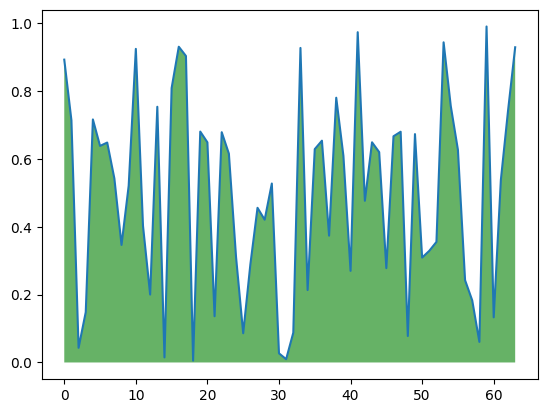

In [141]:
plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

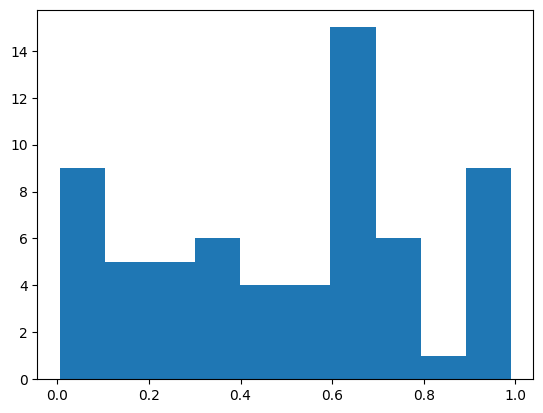

In [142]:
plt.hist(ys)

plt.show()

In [143]:
# specify the lower and upper bounds of the random distribution
ys = rng.uniform(1, 2, size=64)
print(ys)
x = [x for x in range(len(ys))]

[1.84369568 1.17979376 1.68096    1.71302594 1.0260966  1.41244815
 1.11501369 1.4012461  1.94396392 1.710757   1.56496084 1.98455927
 1.3137311  1.36479347 1.76262821 1.10420417 1.37841058 1.58865204
 1.83789633 1.82081323 1.31793534 1.88347674 1.80436282 1.74341449
 1.3271872  1.42541853 1.54748387 1.09900457 1.24781818 1.21508779
 1.37528259 1.26189232 1.60745489 1.43738136 1.32272934 1.76692587
 1.38826073 1.67108516 1.42551501 1.85616208 1.98918335 1.67889903
 1.22033672 1.47180265 1.99340924 1.38177799 1.47850493 1.64023906
 1.81092967 1.09047309 1.2313669  1.38823367 1.46780547 1.80931578
 1.30450374 1.25701643 1.03246714 1.15580202 1.66511328 1.26850864
 1.73873327 1.19042831 1.561625   1.49629001]


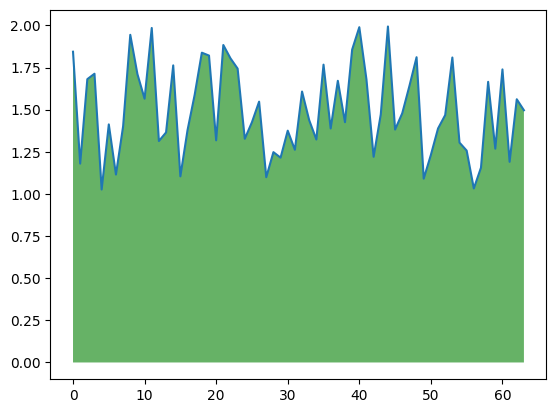

In [145]:
plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

In [146]:
ys = rng.standard_normal(size=64)

print(ys)
x = [x for x in range(len(ys))]

[ 0.26069668 -1.85579176 -1.09078275  0.01555429  0.58552506  0.30858141
 -0.67350967 -0.25324005 -1.17283599  0.69871592 -0.21268903  1.0692549
 -0.31471902  0.91607345 -0.43491263  0.45834408  1.64411878  1.8066699
 -0.88495794 -0.45720991  0.76637555  0.01802435 -0.82728462 -1.29560919
 -0.73985862 -2.62252464 -0.91442384 -0.92412645 -0.79244199 -0.0497223
 -0.88440381 -0.48993     0.56450787 -1.20610045  0.45667675 -0.16580337
 -0.71842423  0.84389417  0.65519399  1.27245037  0.26830911  1.01905608
 -0.52836036  2.45201917  1.17117185  0.86162342  0.19383365 -0.39329897
 -1.52440425  0.28395072  1.19569703  0.31882967  1.19328638  0.55281792
  0.66902686  0.08129804  1.71337756 -0.57018104  0.52453474 -0.22665174
 -0.27275085 -1.94980169 -0.58296816  0.52515649]


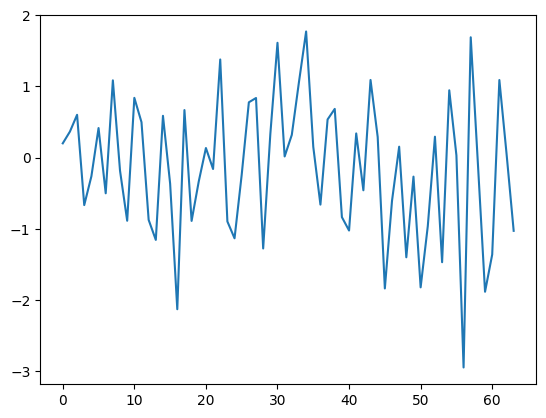

In [138]:
plt.plot(x, ys)

plt.show()

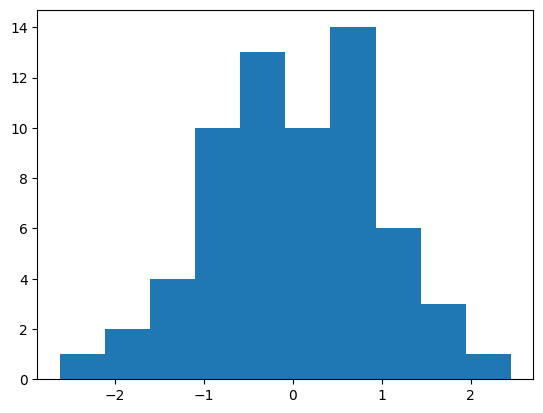

In [147]:
plt.hist(ys)

plt.show()